# Maximum Likelihood Estimation

In [1]:
import numpy as np
from scipy import optimize
from math import factorial
from matplotlib import pyplot

## Definition

When $f(x | \theta)$ is viewed as a function of $x$ with $\theta$ fixed, it is a probability density function, and when viewed as a function of $\theta$ with $x$ fixed, it is a likelihood function.

Considering an i.i.d. (independent and identically distributed) sample $x_1, x_2 , \dots, x_n$, the likelihood function is equal to the product of their probability mass functions.

References:
* https://math.stackexchange.com/questions/2399613/how-to-derive-the-likelihood-and-loglikelihood-of-the-poisson-distribution
* https://www.statlect.com/fundamentals-of-statistics/Poisson-distribution-maximum-likelihood

$$L(\theta | x_1, x_2, \dots, x_n) = \prod{P(x_i | \theta)}$$

## Objective

We wish to estimate $\theta$, or any other parameter the distribution has (can be multiple parameters).

## About Log Probability

https://en.wikipedia.org/wiki/Log_probability

> The use of log probabilities improves numerical stability, when the probabilities are very small, because of the way in which computers approximate real numbers.

## About Maximization

Why does finding the $x$ that maximizes $ln(f(x))$ is the same as finding the $x$ that maximizes $f(x)$?

Read: https://math.stackexchange.com/questions/647835/why-does-finding-the-x-that-maximizes-lnfx-is-the-same-as-finding-the

## Examples

In [2]:
def normal_eval(x, mean, std):
  result = np.log(1)
  result -= np.log(std)
  result -= np.log(np.sqrt(2 * np.pi))
  result -= 0.5 * ((x - mean) / std)**2
  return result

def poisson_eval(k, lam):
  result = np.log(lam**k)
  result += -lam
  result -= np.log(factorial(k))
  return result

### Normal Distribution

https://en.wikipedia.org/wiki/Normal_distribution

In [3]:
correct_mean = 57.1
correct_std = 13.1

sample = np.random.normal(loc=correct_mean, scale=correct_std, size=3000)

# TODO: Verify!!
def normal_log_likelihood(args):
  mean, std = args
  return sum([normal_eval(xi, mean, std) for xi in sample])

optimize.minimize(lambda x: -normal_log_likelihood(x), [40, 20]).x

array([57.17427284, 13.03518527])

### Poisson Distribution

https://en.wikipedia.org/wiki/Poisson_distribution

In [4]:
correct_lambda = 7.61

sample = np.random.poisson(lam=correct_lambda, size=3000)

# TODO: Verify!!
def poisson_log_likelihood(lam):
  return sum([poisson_eval(xi, lam) for xi in sample])

optimize.minimize(lambda x: -poisson_log_likelihood(x), 5).x

array([7.70400293])

### Linear Regression

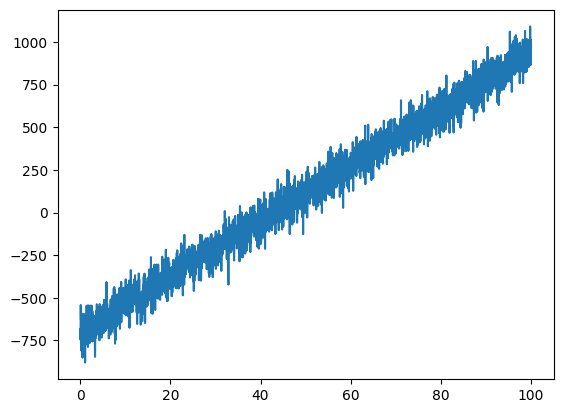

In [5]:
correct_b0 = -700
correct_b1 = 16.3
correct_std = 63.5

def fn(x):
  return correct_b0 + correct_b1 * x

x = np.linspace(0, 100, 3000)
noise = np.random.normal(loc=0, scale=correct_std, size=len(x))
y = np.vectorize(fn)(x) + noise

pyplot.plot(x, y)

# TODO: Review this

Explanation can be found in the book *Mathematics for Machine Learning*.
https://mml-book.github.io/

Another simple way of explaining it:

Imagine we have already fitted the line using $\beta_0 + \beta_1 x$. At every $x$ of the original sample, there could be one or multiple $y$ corresponding values (i.e. the noise), which are distributed under a normal distribution having its center (mean) on the fitted line. The mean is therefore also given by the line $\beta_0 + \beta_1 x$.

This means the $y$ values are distributed under:

$$N(\beta_0 + \beta_1 x,~ \sigma)$$

The standard deviation $\sigma$ of the noise is a fixed constant value.

Therefore we must estimate the $\beta_0,~ \beta_1,~ \sigma$ parameters.

In [6]:
def normal_log_likelihood_linear_regression(args):
  b0, b1, std = args
  result = 0

  for xi, yi in zip(x, y):
    u = b0 + b1 * xi
    result += normal_eval(yi, u, std)

  return result


bounds = ((None, None), (None, None), (0.000001, None))
optimize.minimize(lambda x: -normal_log_likelihood_linear_regression(x), [50, 50, 50], bounds=bounds).x

array([-699.54096836,   16.29362741,   64.97164465])